# Machine Learning Notebook

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('../data/df_cleaned.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   administrative           12330 non-null  int32   
 1   administrative_duration  12330 non-null  float64 
 2   informational            12330 non-null  int32   
 3   informational_duration   12330 non-null  float64 
 4   productrelated           12330 non-null  int32   
 5   productrelated_duration  12330 non-null  float64 
 6   bouncerates              12330 non-null  float64 
 7   exitrates                12330 non-null  float64 
 8   pagevalues               12330 non-null  float64 
 9   specialday               12330 non-null  float64 
 10  month                    12330 non-null  category
 11  operatingsystems         12330 non-null  category
 12  browser                  12330 non-null  category
 13  region                   12330 non-null  category
 14  traffi

**First 5 Features represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.**

### Data preparation for ML input
* One-Hot Encode Categorical Values
* Normlize Numeric Values
* Consider Target Class Imbalance effect on model performance. 

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

In [12]:
# encode target variable
df.revenue = df.revenue.cat.codes

In [14]:
X = df.drop(columns=['revenue'])
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
print(X.shape)
print(y.shape)

(12330, 17)
(12330,)


In [16]:
# create numeric pre-processing step
numeric_transformer = Pipeline(steps=[
                                ('scaler', StandardScaler())
                                    ])
    
# create One Hot Encoder step for categorical 
categorical_transformer = Pipeline(steps=[
                                ('onehot', OneHotEncoder())
                                        ])

In [19]:
numeric_features = df.select_dtypes(include=['number']).drop(columns='revenue').columns
categorical_features = df.select_dtypes(include=['category']).columns

# create pre-processor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [20]:
# instantiate model with pipeline steps
rf = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('classifier', RandomForestClassifier())
                    ])

In [23]:
# Fit model with pipeline steps to training data
rf.fit(X_train, y_train);

# Make predictions
y_pred = rf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

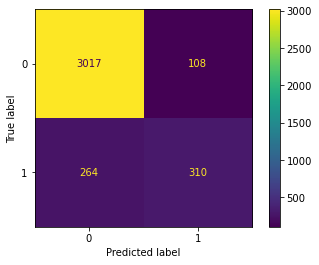

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot();

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3125
           1       0.74      0.54      0.62       574

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699



As we can see, the imbalanced target class requires some refinement in order to hopefully improve model performance.